In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shapereader
from shapely.geometry import Polygon
from descartes import PolygonPatch
import geopandas as gpd
import numpy as np
import shapefile  
import csv
from itertools import zip_longest
import pandas as pd
from pandas import DataFrame

In [2]:
# generate grid of polygons

xmin = -180
ymin = -90
xmax = 180
ymax =  90

In [3]:
# limits of each polygon

length = 5
wide = 5

In [4]:
cols = list(np.arange(xmin, xmax + wide, wide))
rows = list(np.arange(ymin, ymax + length, length))

In [5]:
polygons = []

for x in cols[:-1]:
    for y in rows[:-1]:
        polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))

In [6]:
grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid.shp")

In [7]:
# checking grid by counting

if len(polygons) == 2592:
    print("Grid correct")

Grid correct


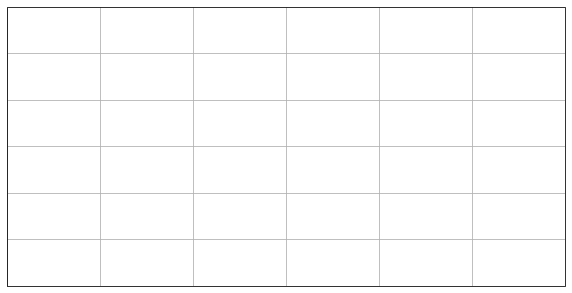

In [8]:
#create figure

fig1 = plt.figure(figsize=(10,10)) 
PLT = plt.axes(projection=ccrs.PlateCarree())
PLT.set_extent([-180,180,90,-90])
PLT.gridlines()

In [9]:
#import and display Nautral Earth shapefile

fname = 'ne_10m_admin_0_countries.shp'
adm1_shapes = list(shapereader.Reader(fname).geometries())
PLT.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='gray', alpha=0.5)

In [ ]:
# for each country, calculate the overlap with each grid cell

datafile = 'Potential_restoration_by_country.csv'
pop_df = pd.read_csv(datafile)
Countries = pop_df.iloc[:,0].tolist()
df = pd.DataFrame()

for c in Countries:
    Intersections = []
    Geom = []

    for country in shapereader.Reader(fname).records():
        
        if country.attributes['ADMIN'] == '{}'.format(c): 
            # define country polygon
            
            Country_polygon = country.geometry
            
            for poly in polygons:

                # PLT.add_patch(PolygonPatch(poly, fc='#cc00cc', ec='#555555', alpha=0.5, zorder=5))       
                # calculate intersect
                
                x = poly.intersection(Country_polygon)
                Country_intersect = x.area/Country_polygon.area*100
                Intersections.append(Country_intersect)
                Geom.append(poly.centroid.wkt)

In [ ]:
# df = DataFrame(Intersections, columns=['{} - % Intersect'.format(c)])

df['{} - % Intersect'.format(c)] = Intersections       
df['Polygon centroid'] = Geom
df.to_csv('Country_intersects.csv')